# Step 5: Extracting Segments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mcdonalds = pd.read_csv('mcdonalds.csv')

In [3]:
mcdonalds.shape

(1453, 15)

In [4]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
# Extract the first eleven columns and convert to matrix
MD_x = np.array(mcdonalds.iloc[:, :11])

# Transform "Yes" entries to 1 and other entries to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [6]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Get the explained variance
explained_variance = pca.explained_variance_

# Get the standard deviation
standard_deviation = np.sqrt(explained_variance)

# Summarize the PCA results
variance_explained = np.cumsum(explained_variance_ratio)

print("PCA Summary:")
print("------------")
print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nExplained Variance:")
print(explained_variance)
print("\nStandard Deviation:")
print(standard_deviation)
print("\nCumulative Variance Explained:")
print(variance_explained)

PCA Summary:
------------
Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Explained Variance:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Standard Deviation:
[0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]

Cumulative Variance Explained:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [7]:
import numpy as np
from sklearn.cluster import KMeans

# Set the random seed
np.random.seed(1234)

# Define the number of segments range
segment_range = range(2, 9)
n_restarts = 10

# Perform K-means clustering with multiple random restarts
MD_kmeans = {}

for n_segments in segment_range:
    kmeans = KMeans(n_clusters=n_segments, n_init=n_restarts, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    MD_kmeans[str(n_segments)] = labels

# Relabel the segment numbers
segment_range = range(2, 9)
relabeled_MD_kmeans = {}

for n_segments in segment_range:
    labels = MD_kmeans[str(n_segments)]
    unique_labels = np.unique(labels)
    relabeled_labels = np.arange(len(unique_labels))
    relabel_mapping = dict(zip(unique_labels, relabeled_labels))
    relabeled_MD_kmeans[str(n_segments)] = [relabel_mapping[label] for label in labels]

MD_km28 = relabeled_MD_kmeans

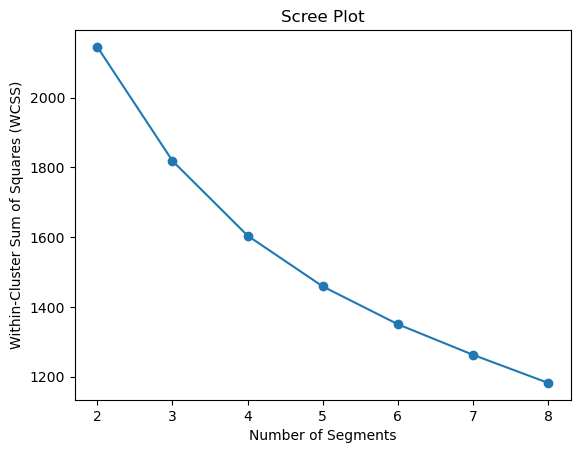

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

# Calculate the WCSS for each solution
for n in segment_range:
    kmeans = KMeans(n_clusters=n, n_init=n_restarts)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)

# Plot the scree plot
plt.plot(segment_range, wcss, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot')
plt.show()

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample

np.random.seed(1234)

n_segments = range(2, 9)
n_restarts = 10
n_bootstraps = 100
boot_results = []

for n in n_segments:
    segment_results = []
    for _ in range(n_bootstraps):
        # Resample the data with replacement
        bootstrap_data = resample(MD_x)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=n, n_init=n_restarts)
        labels = kmeans.fit_predict(bootstrap_data)

        # Store the clustering results
        segment_results.append(labels)

    boot_results.append(segment_results)

# Convert the results to a dictionary format
MD_b28 = {}
for i, n in enumerate(n_segments):
    MD_b28[str(n)] = boot_results[i]


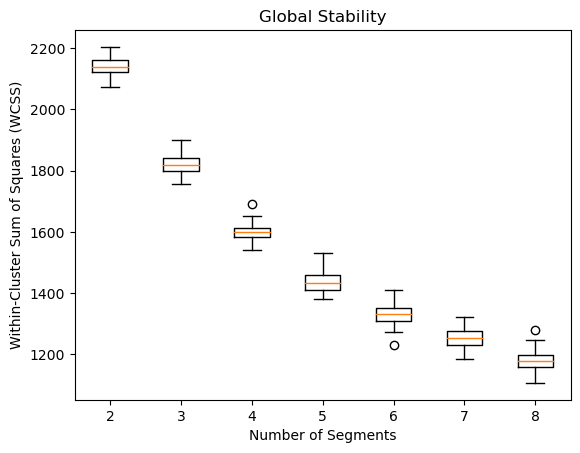

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(1234)

n_segments = range(2, 9)
n_restarts = 10
n_bootstraps = 100
boot_results = []

for n in n_segments:
    segment_results = []
    for _ in range(n_bootstraps):
        # Resample the data with replacement
        bootstrap_data = resample(MD_x)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=n, n_init=n_restarts)
        labels = kmeans.fit_predict(bootstrap_data)

        # Calculate the within-cluster sum of squares (WCSS)
        cluster_centers = kmeans.cluster_centers_
        wcss = np.sum((bootstrap_data - cluster_centers[labels]) ** 2)
        segment_results.append(wcss)
    boot_results.append(segment_results)

# Plot the global stability boxplot
plt.boxplot(boot_results)
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, len(n_segments) + 1), n_segments)
plt.title('Global Stability')
plt.show()

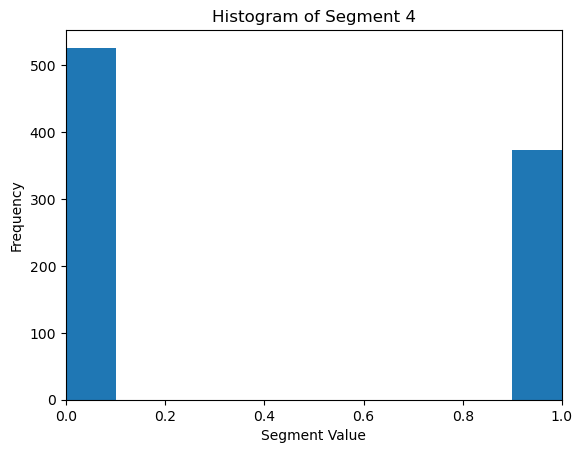

In [11]:
import matplotlib.pyplot as plt

# Select the segment labeled "4" from MD_km28
segment_4 = MD_km28['4']

# Create the histogram plot
plt.hist(segment_4, bins=10, range=(0, 1))
plt.xlabel('Segment Value')
plt.ylabel('Frequency')
plt.title('Histogram of Segment 4')
plt.xlim(0, 1)
plt.show()

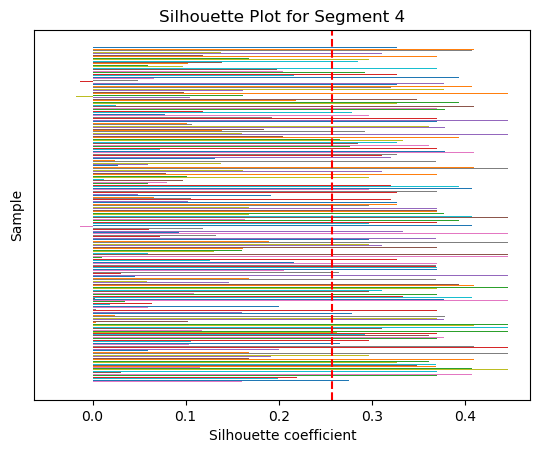

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Compute the silhouette scores
silhouette_scores = silhouette_samples(MD_x, MD_km28['4'])

# Compute the average silhouette score
avg_silhouette_score = silhouette_score(MD_x, MD_km28['4'])

# Create a silhouette plot
fig, ax = plt.subplots()
y_lower = 10
for i, score in enumerate(silhouette_scores):
    ax.barh(i, score, height=0.7)
    y_lower += 1

ax.set_xlabel('Silhouette coefficient')
ax.set_ylabel('Sample')
ax.axvline(x=avg_silhouette_score, color='red', linestyle='--')
ax.set_yticks([])

plt.title('Silhouette Plot for Segment 4')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for each sample in the four-segment solution
silhouette_scores = silhouette_score(MD_x, MD_k4)

# Print the average silhouette score
print("Average Silhouette Score:", silhouette_scores)

Average Silhouette Score: 0.2574888202082713


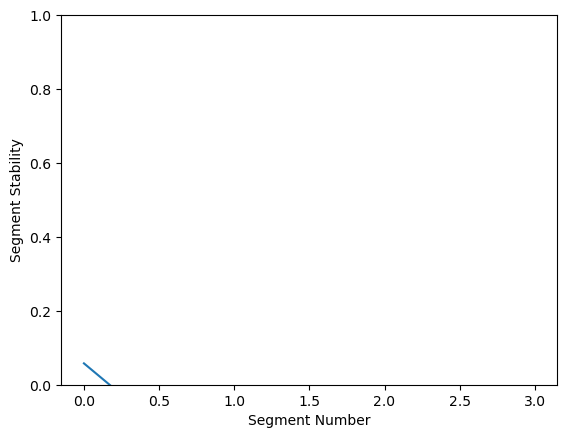

In [15]:
from sklearn.cluster import KMeans

# Perform K-means clustering with the chosen solution (MD.k4)
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(MD_x)  # MD_x is your data matrix

# Calculate the within-cluster sum of squares (WCSS) for each segment
segment_stability_values = []
for i in range(4):  # Replace 4 with the actual number of segments in MD.k4
    segment_points = MD_x[labels == i]  # Data points belonging to the segment i
    segment_wcss = np.sum(np.square(segment_points - kmeans.cluster_centers_[i]))
    segment_stability = 1 - (segment_wcss / len(segment_points))
    segment_stability_values.append(segment_stability)

# Plot the segment stability result
plt.plot(segment_stability_values)
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.show()

# Using Mixtures of Distributions

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

n_components = range(2, 9)
n_restarts = 10

MD_m28 = {}

# Perform model-based clustering for each number of components
for n in n_components:
    gm = GaussianMixture(n_components=n, n_init=n_restarts, random_state=1234)
    gm.fit(MD_x)
    MD_m28[str(n)] = gm.predict(MD_x)

# Print the clustering results
for n, labels in MD_m28.items():
    print("Number of Components:", n)
    print("Cluster Labels:", labels)
    print()

Number of Components: 2
Cluster Labels: [1 1 1 ... 1 1 0]

Number of Components: 3
Cluster Labels: [2 1 1 ... 1 0 2]

Number of Components: 4
Cluster Labels: [3 3 2 ... 3 0 3]

Number of Components: 5
Cluster Labels: [3 4 4 ... 4 2 3]

Number of Components: 6
Cluster Labels: [1 0 5 ... 4 4 3]

Number of Components: 7
Cluster Labels: [4 0 0 ... 3 5 6]

Number of Components: 8
Cluster Labels: [3 5 5 ... 5 6 0]



In [17]:
import numpy as np
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

# Perform model-based clustering for different number of segments
n_segments = range(2, 9)
results = {}

for n in n_segments:
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n, random_state=1234)
    gmm.fit(MD_x)

    # Store the model in the results dictionary
    results[str(n)] = gmm

# Print the results
for n, model in results.items():
    print(f"Number of Segments: {n}")
    print(model)
    print()

Number of Segments: 2
GaussianMixture(n_components=2, random_state=1234)

Number of Segments: 3
GaussianMixture(n_components=3, random_state=1234)

Number of Segments: 4
GaussianMixture(n_components=4, random_state=1234)

Number of Segments: 5
GaussianMixture(n_components=5, random_state=1234)

Number of Segments: 6
GaussianMixture(n_components=6, random_state=1234)

Number of Segments: 7
GaussianMixture(n_components=7, random_state=1234)

Number of Segments: 8
GaussianMixture(n_components=8, random_state=1234)



In [22]:
import numpy as np

kmeans_clusters = MD_k4
mixture_clusters = MD_m4

# Check if the cluster assignments are equal
clusters_equal = np.array_equal(kmeans_clusters, mixture_clusters)
print("Cluster assignments are equal:", clusters_equal)

Cluster assignments are equal: False


In [23]:
import pandas as pd

kmeans_clusters = MD_k4
mixture_clusters = MD_m4

table = pd.crosstab(kmeans_clusters, mixture_clusters)
print(table)

col_0    0   1   2    3
row_0                  
0      449   3  46   28
1      288  36   9   40
2        0  87   0  152
3        0   6  71  238


In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

kmeans_clusters = MD_k4  # Replace with the k-means cluster assignments
n_components = len(np.unique(kmeans_clusters))

# Fit Gaussian mixture model with the given cluster assignments
gmm = GaussianMixture(n_components=n_components, random_state=1234)
gmm.fit(MD_x)

# Obtain the cluster assignments from the GMM
gmm_clusters = gmm.predict(MD_x)

# Compare cluster assignments
table = pd.crosstab(kmeans_clusters, gmm_clusters)
print(table)

col_0    0    1    2    3
row_0                    
0        0  340    0  186
1        0   49  259   65
2      199    1   35    4
3      256    2    0   57


In [25]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian mixture model with the given cluster assignments
gmm_a = GaussianMixture(n_components=n_components, random_state=1234)
gmm_a.fit(MD_x)

# Compute log-likelihood for MD.m4a
log_likelihood_a = gmm_a.score(MD_x)

# Compute log-likelihood for MD.m4 (using previous GMM fitting)
log_likelihood_m4 = gmm.score(MD_x)

print("log Lik. MD.m4a:", log_likelihood_a)
print("log Lik. MD.m4:", log_likelihood_m4)


log Lik. MD.m4a: 4.8714545419035264
log Lik. MD.m4: 4.8714545419035264


# Using Mixtures of Regression Models

In [26]:
import pandas as pd

# Reverse the table
reversed_table = mcdonalds['Like'][::-1]

# Print the reversed table
print(reversed_table)

1452              -3
1451              +4
1450              +3
1449              +2
1448    I hate it!-5
            ...     
4                 +2
3                 +4
2                 +1
1                 +2
0                 -3
Name: Like, Length: 1453, dtype: object


In [30]:
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
import pandas as pd

table = mcdonalds['Like.n'].value_counts()
print(table)

3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: Like.n, dtype: int64


In [48]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Assuming you have prepared the 'mcdonalds' DataFrame and 'Like.n' column as mentioned earlier

# Encode categorical variables to numerical values
encoded_mcdonalds = mcdonalds.copy()
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
label_encoder = LabelEncoder()
for column in categorical_columns:
    encoded_mcdonalds[column] = label_encoder.fit_transform(encoded_mcdonalds[column])

# Fit the Gaussian Mixture Model
column_names = encoded_mcdonalds.columns[:11]
data = encoded_mcdonalds[column_names].values
model = GaussianMixture(n_components=2)
model.fit(data)

# Obtain the refit model
MD_ref2 = model

# Print the summary
print("Weights:")
print(MD_ref2.weights_)
print("Means:")
print(MD_ref2.means_)
print("Covariances:")
print(MD_ref2.covariances_)

Weights:
[0.32209222 0.67790778]
Means:
[[0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]
 [0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]]
Covariances:
[[[ 2.01563386e-01  3.52746731e-02  1.79569362e-02 -1.36834319e-02
   -2.05365622e-02 -3.50692161e-02  1.51672876e-02  1.45586785e-01
    4.57484110e-03  4.06074220e-02 -7.22432246e-02]
  [ 3.52746731e-02  2.04343903e-01  8.30046022e-03  2.16140697e-02
    8.07217472e-03  5.30535470e-03  2.62254365e-02  4.47896121e-02
   -2.25728687e-02  9.22273357e-03  1.51124990e-02]
  [ 1.79569362e-02  8.30046022e-03  8.69092840e-02  2.83530572e-03
    7.47863248e-03  6.28698224e-03  7.31426693e-03  1.82856673e-02
    5.01314925e-03  2.17784352e-02  1.08070349e-02]
  [-1.36834319e-02  2.16140697e-02  2.83530572e-03  8.69092840e-02
    5.02136752e-02  2.57642998e-02  9.77975017e-03 -1.18754109e-02
    7.8073